## Executive Summary:

This project delves into an exploration of suicide rates from 1985 to 2016, aiming to provide valuable insights for policymakers, public health professionals, mental health experts, researchers, and the general public. Through rigorous analysis and data visualization, the project sheds light on the factors that contribute to suicide rates and identifies patterns and correlations among key variables such as population, GDP per capita, age, and gender.

The analysis reveals that suicide rates are influenced by various factors, including population size, economic conditions, and socio-demographic characteristics. The findings emphasize the importance of mental health support, evidence-based prevention strategies, socio-economic improvements, enhanced data collection, and international collaboration in addressing the complex issue of suicide.

By implementing the recommendations outlined in this report, stakeholders can work together to develop effective strategies, policies, and interventions to combat suicide rates. By prioritizing mental health, addressing socio-economic disparities, and fostering collaboration, we can create a safer and healthier future for all, promoting awareness, and informed decision-making to combat suicide rates effectively. 

## Introduction:

Suicide is a pressing public health issue that demands our attention and understanding. In this project, we embark on an exploration of suicide rates from 1985 to 2016, aiming to shed light on the factors that contribute to this global concern. By delving into a comprehensive dataset, we seek to uncover patterns and correlations that can provide valuable insights for policymakers, public health professionals, mental health experts, researchers, and the general public. Through rigorous analysis and data visualization, we aim to make this complex topic more accessible, fostering awareness and informing evidence-based strategies to combat suicide rates. Join us on this journey as we uncover the multifaceted aspects of suicide and strive to create a safer and healthier future for all.

Firstly, we will perform an exploratory analysis to gain a deeper understanding of the data, uncovering patterns, trends, and potential relationships between variables. This will enable us to identify key metrics within the dataset and establish relevant Key Performance Indicators (KPIs) that align with our objectives. To ensure the reliability and accuracy of our findings, we will diligently clean, filter, and edit the data according to our specific requirements, addressing any inconsistencies or outliers that may impact the analysis. Additionally, we will prioritize data quality and validity by thoroughly examining the dataset for errors, redundancies, and missing information. In cases where data is missing, we will employ appropriate imputation techniques such as linear regression, mean imputation, or ratio imputation to estimate the missing values. By implementing these steps, we aim to ensure the integrity of our analysis, paving the way for robust insights and informed decision-making.

## Methodology

The dataset used for this analysis is "Suicide Rates overview from 1985 to 2016", which was obtained from Kaggle.

### Preprocessing Steps:
Before conducting the analysis, some preprocessing steps were taken to ensure data quality and consistency. The following steps were performed:

1. Data Cleaning: A thorough examination of the dataset was conducted to identify and address missing values, inconsistencies, and outliers.
<br>

2. Data Transformation: The dataset underwent a comprehensive assessment to determine if any transformation techniques were required. This assessment aimed to enhance the suitability of the data for subsequent analysis.
<br>

3. Data Integration: The possibility of integrating multiple datasets to construct a unified dataset for analysis was explored. This integration process involved matching and merging variables based on common identifiers, such as country and year, with the intention of creating a comprehensive dataset.
<br>

### Variables:
The dataset includes the following variables:

1. Country: The name of the country.
2. Year: The year of the recorded data.
3. Sex: The gender of the individual (male or female).
4. Age: The age group of the individual (e.g., 15-24 years).
5. Suicides_no: The number of suicides reported for the specific group.
6. Population: The population count for the specific group.
7. Suicides/100k pop: The suicide rate per 100,000 population for the specific group.
8. Country-year: A combination of country and year for convenience.
9. HDI for year: The Human Development Index (HDI) for the specific year (if available).
10. GDP_for_year: The GDP of the country for the specific year.
11. GDP_per_capita: The GDP per capita of the country for the specific year.
12. Generation: The generational cohort of the individual (e.g., Generation X, Boomers, Silent).

These variables provide the necessary information to analyze suicide rates based on different demographic factors such as age, sex, and generation.


## Descriptive Analysis

In [ ]:
#Importing Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

Firstly, we start by reading the dataset

In [ ]:
df = pd.read_csv('master.csv')
df.head() #prints the first 5 rows

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Next we gain general information about our dataset using df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


df.columns shows us what column headers we would be working on with in this project.

In [ ]:
df.columns # shows the headers in the dataset

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Using df.describe(), we would like to know the basic statistics for numerical columns in the dataset.

In [ ]:
# basic statistics for numerical column
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Here are some insights that can be derived from the above statistics:
<br>

1. Suicides: The dataset consists of information on suicide counts (suicides_no). The minimum number of suicides recorded is 0, while the maximum is 22,338. The average number of suicides is approximately 242, and the median (50th percentile) is 25. The standard deviation is relatively high at 902, indicating significant variability in suicide counts across the dataset.
<br>

2. Population: The dataset includes population data, representing the size of the population (population) for each observation. The minimum population recorded is 278, while the maximum is 43,805,210. The average population is approximately 1,844,794, with a median value of 430,150. The standard deviation suggests substantial variation in population sizes among the recorded data points.
<br>

3. Suicide Rate: The dataset provides information on the suicide rate per 100,000 population (suicides/100k pop). The minimum recorded rate is 0, indicating instances where no suicides occurred within a given population. The maximum rate is 224.97, reflecting a high concentration of suicides within a specific population. The average suicide rate is approximately 12.82 per 100,000 population, with a median rate of 5.99. The standard deviation of 18.96 highlights notable disparities in suicide rates across different observations.
<br>

4. Human Development Index (HDI): The dataset incorporates the Human Development Index (HDI for year), which is a measure of a country's overall development based on factors like life expectancy, education, and income. The HDI values range from 0.483 to 0.944, with an average HDI of 0.7766. The distribution of HDI values indicates variations in development levels among the countries represented in the dataset.
<br>

5. GDP per Capita: The dataset includes information on the Gross Domestic Product (GDP) per capita. The minimum recorded value is USD 251, while the maximum is USD 126,352. The average GDP per capita is approximately USD 16,866, with a median value of USD 9,372. The standard deviation of USD 18,887 indicates significant disparities in economic prosperity across the dataset.
<br>

These insights provide an overview of the key variables in the dataset and their basic statistical properties, offering a foundation for further analysis and investigation of relationships between the variables.

For non-numerical dataset we include 'object' in the df.describe method to figure out the basic statistics for non-numerical data.

In [ ]:
#basic statistics for non-numerical column
df.describe(include=['object'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


Here are some insights that can be derived from the non-numerical key performance variables in the dataset:

1. Country: The dataset includes information on the countries represented in the data. There are a total of 101 unique countries in the dataset. The country with the highest frequency in the dataset is Mauritius, appearing 382 times.
<br>

2. Sex: The dataset includes gender information, categorized as male and female. The variable 'sex' has two unique categories. The most frequent category is male, appearing 13,910 times in the dataset.
<br>

3. Age: The dataset provides age groups for the observations. The 'age' variable has six unique categories, representing different age ranges. The age group "15-24 years" has the highest frequency, appearing 4,642 times in the dataset.
<br>

4. Country-Year: The dataset includes a combination of country and year information. The 'country-year' variable has 2,321 unique combinations, indicating multiple observations for each country in different years. The combination "Albania1987" appears 12 times, which is the highest frequency among the country-year combinations.
<br>

5. GDP for Year: The dataset includes the Gross Domestic Product (GDP) for each year. The 'gdp_for_year' variable has 2,321 unique values, representing different GDP values for different years. The highest frequency is 12, indicating that 12 observations share the same GDP value.
<br>

6. Generation: The dataset includes information about the generation to which individuals belong. The 'generation' variable has six unique categories, representing different generations. The most frequent generation in the dataset is Generation X, appearing 6,408 times.
<br>

These insights provide an overview of the non-numerical variables in the dataset, their unique categories, and their frequency distribution. Understanding these variables can help in further analysis, such as exploring patterns and relationships based on country, gender, age, country-year combinations, GDP, and generation.

Now the real deal, let's take a look at the null values in this dataset, using df.isnull() and .sum() to sum it up by each column.

In [ ]:
# checking what columns has null values.
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

It can be observed that the "HDI for year" column has a significant number of null values, specifically 19,456 missing entries. All other columns in the dataset do not have any null values, as indicated by a count of zero for each respective column.

In order to represent the presence of missing values in the dataset in form of visulaization, the missingno library was utilized. By using the msno.matrix(df) function, a matrix plot was generated to visualize the missing data patterns. This allowed for a quick overview of the distribution and extent of missing values across the variables in the dataset. Visualizing the missing data aids in understanding the data quality and informs decisions regarding appropriate handling of missing values before conducting further analysis.

In [ ]:
!pip install missingno




<AxesSubplot:>

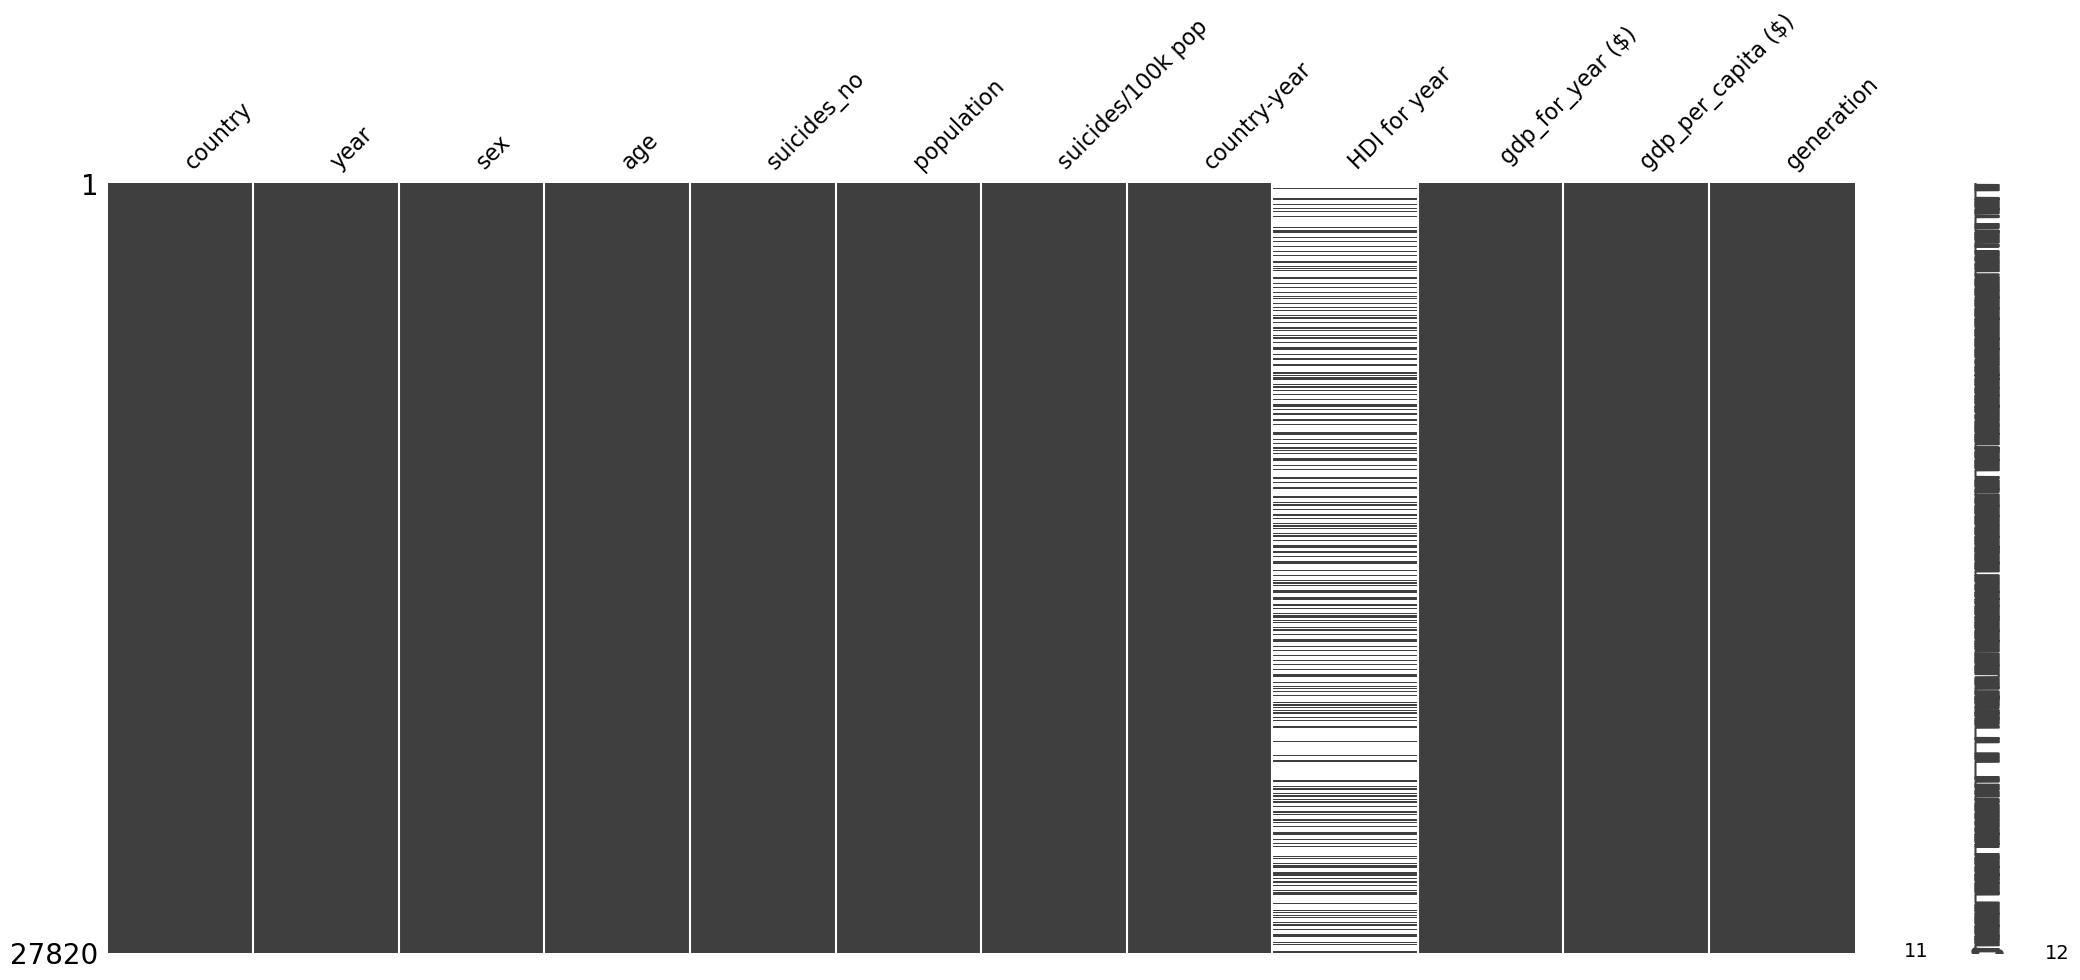

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
# Calculate statistics for 'suicides_no' column
minimum = df['suicides_no'].min()
maximum = df['suicides_no'].max()
mean = df['suicides_no'].mean()
median = df['suicides_no'].median()

# Print the calculated statistics
print("Minimum: ", minimum)
print("Maximum: ", maximum)
print("Mean: ", mean)
print("Median: ", median)

Minimum:  0
Maximum:  22338
Mean:  242.57440690150972
Median:  25.0


In the analysis of the 'suicides_no' column, several statistics were calculated to gain insights into the distribution of suicide numbers. The minimum value of 0 suggests that there are years with no reported suicides. On the other hand, the maximum value of 22,338 represents the highest number of suicides recorded in our dataset.

The mean value of approximately 242.57 indicates the average number of suicides in total, while the median value of 25.0 represents the middle value in the sorted distribution. Comparing the mean and median, it can be observed that the distribution of 'suicides_no' is positively skewed. This skewness implies that the tail of the distribution extends to the right, indicating the presence of a few extremely high values that significantly affect the mean.

Consequently, the 'suicides_no' variable exhibits a distribution that is skewed to the right, indicating a concentration of lower values with a few instances of exceptionally high values.

#### Correlation Analysis and Heatmap: Relationship Among Numerical Key Variables

<AxesSubplot:title={'center':'Correlation Heatmap'}>

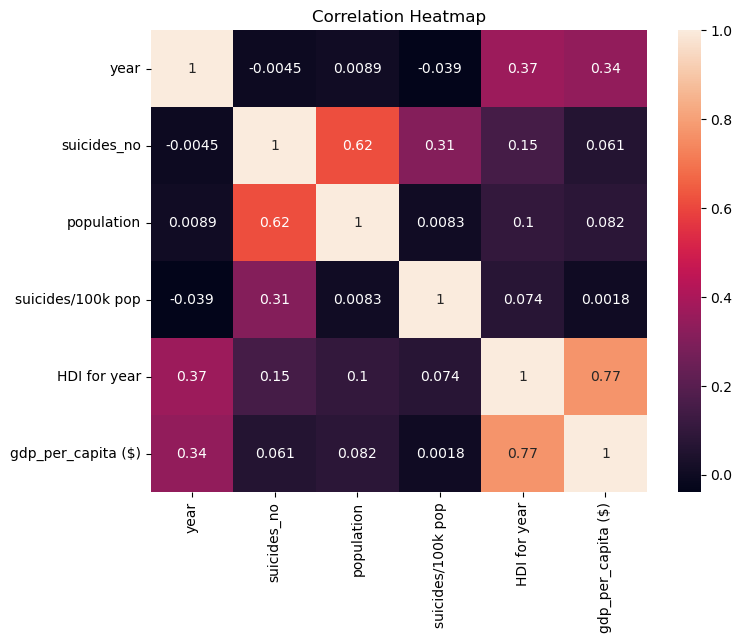

In [ ]:
corr = df[['year','suicides_no','population',
       'suicides/100k pop', 'HDI for year',
        'gdp_per_capita ($)',' gdp_for_year ($) ']].corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
sns.heatmap(corr,annot=True)

In [ ]:
corr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


The correlation matrix shows the pairwise correlation coefficients between key performance variables in the dataset. Here are some notable insights:
<br>

1. Suicides number and Population: There is a positive correlation of 0.616 between the number of suicides and the population. This indicates that as the population increases, the number of suicides also tends to increase.
<br>

2. Suicides and HDI for Year: The correlation coefficient between suicides and the Human Development Index (HDI) for the corresponding year is 0.151. Although the correlation is positive, it is relatively weak, suggesting that there is only a modest relationship between suicides and the level of human development.
<br>

3. Suicides and GDP per Capita: The correlation coefficient between suicides and the GDP per capita is 0.061, indicating a weak positive relationship. This suggests that there is only a minor association between economic prosperity (as measured by GDP per capita) and the number of suicides.
<br>

4. HDI for Year and GDP per Capita: There is a strong positive correlation of 0.771 between the HDI for the corresponding year and the GDP per capita. This indicates that higher levels of human development tend to be associated with higher GDP per capita.
<br>

5. Year and Variables: The correlation coefficients between the year and other variables (suicides, population, suicides/100k pop, HDI for year, and GDP per capita) are generally small, ranging from -0.04 to 0.37. This suggests that there is no strong linear relationship between the year and these variables.
<br>

Overall, the correlation analysis provides insights into the relationships among the variables in the dataset. It suggests that factors such as population, HDI for the year, and GDP per capita may have some influence on the number of suicides, but further analysis and consideration of other factors are necessary to fully understand the complex nature of suicide rates.

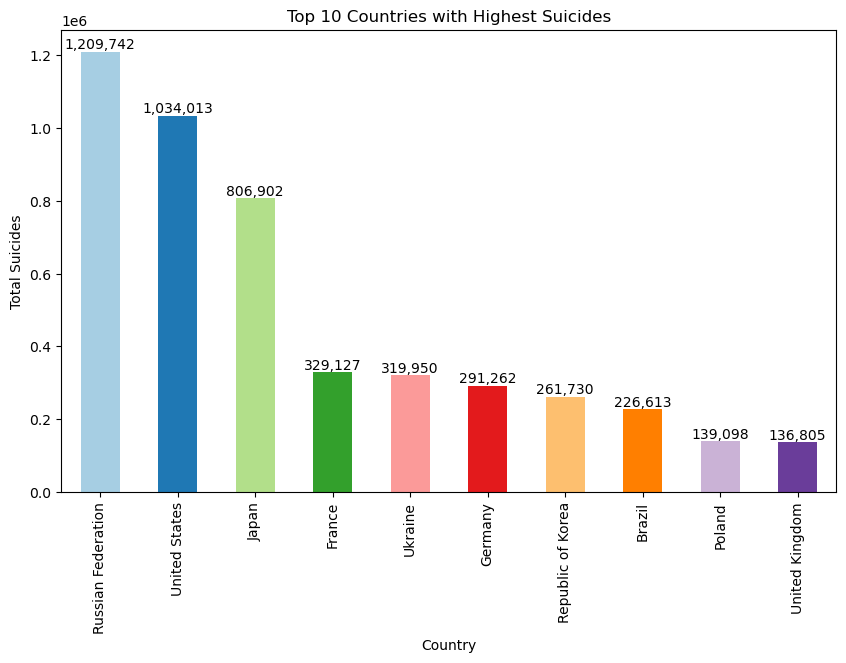

In [ ]:
# Bar plot for country and suicide rate
df_country_suicide = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)

# Define a color palette
colors = sns.color_palette('Paired', len(df_country_suicide))

# Plot the bar plot with the custom color palette
ax = df_country_suicide.plot(kind='bar', figsize=(10, 6), color=colors)

# Add data labels to the bars
for i, v in enumerate(df_country_suicide):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

# Set x-axis and y-axis labels
plt.xlabel('Country')
plt.ylabel('Total Suicides')

# Set the title of the plot
plt.title('Top 10 Countries with Highest Suicides')

# Display the plot
plt.show()

The Country and Suicide number bar plot illustrates that the Russian Federation has the largest overall number of suicides throughout time, while the United Kingdom has the lowest.

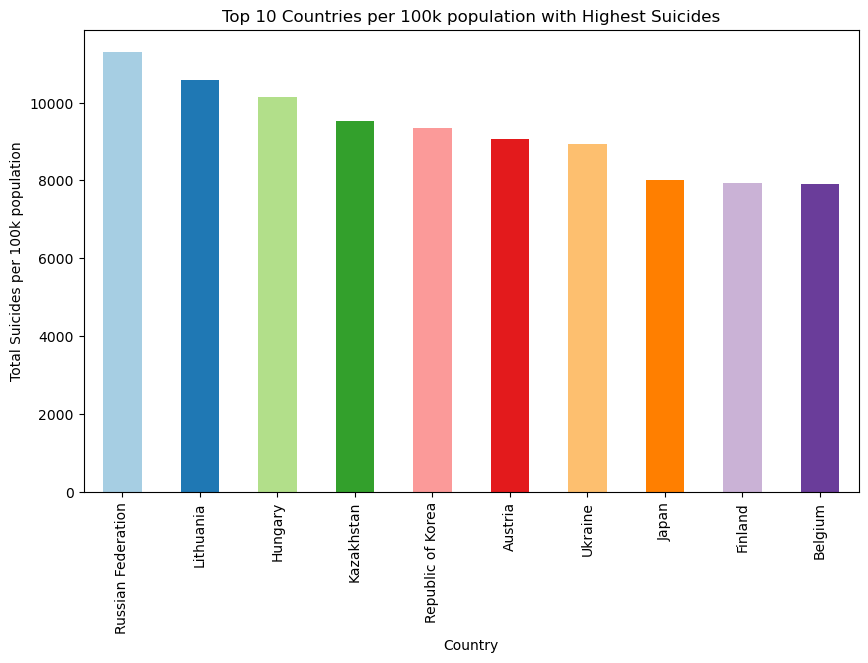

In [ ]:
# Bar plot for country and suicide rate per 100k population
df_country_suicide100k = df.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False).head(10)

# Define the color palette
colors = sns.color_palette('Paired', len(df_country_suicide100k))

# Create the bar plot
df_country_suicide100k.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total Suicides per 100k population')
plt.title('Top 10 Countries per 100k population with Highest Suicides')

# Show the plot
plt.show()


When the barplot of the Top 10 Countries per 100k population with the top Suicides was examined, the Russian Federation remained the top in terms of suicide occurrence, while Belgium ranked the lowest.

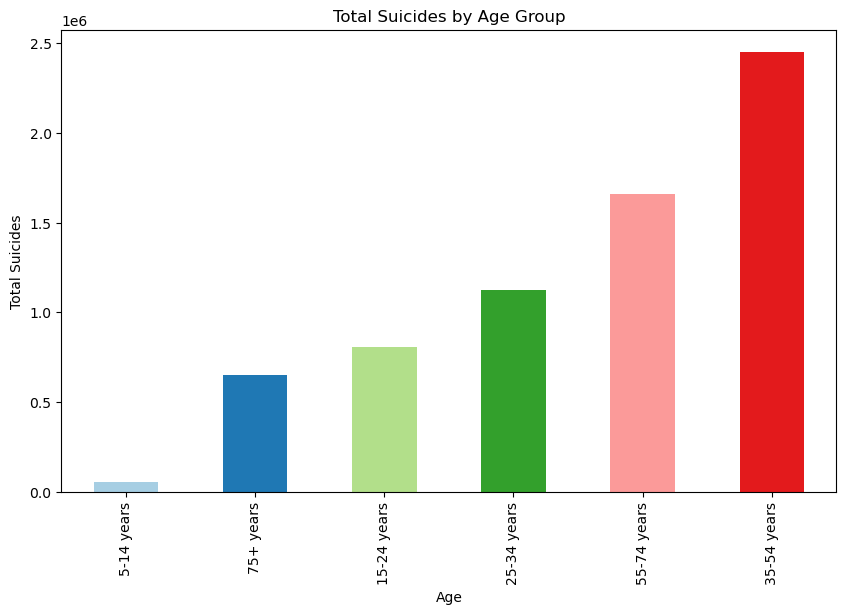

In [ ]:
# Bar plot for age and suicide rate
df_age_suicide = df.groupby('age')['suicides_no'].sum().sort_values(ascending=True)

# Define the color palette
colors = sns.color_palette('Paired', len(df_age_suicide))

# Create the bar plot
df_age_suicide.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Age Group')

# Show the plot
plt.show()


The age and suicide rate bar plot illustrates that those aged 35 to 54 years perpetrated the most suicides over time, while people aged 5 to 14 years had the fewest suicide events.

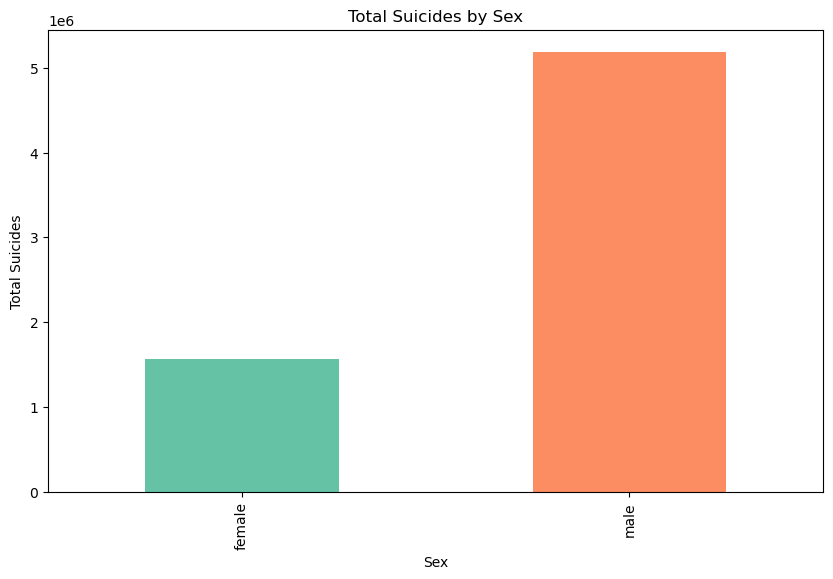

In [ ]:
# Bar plot for sex and suicide rate
df_sex_suicide = df.groupby('sex')['suicides_no'].sum().sort_values(ascending=True)

# Define the color palette
colors = sns.color_palette('Set2', len(df_sex_suicide))

# Create the bar plot
df_sex_suicide.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Sex')

# Show the plot
plt.show()

It has been found that more males have committed suicide across all countries throughout time.

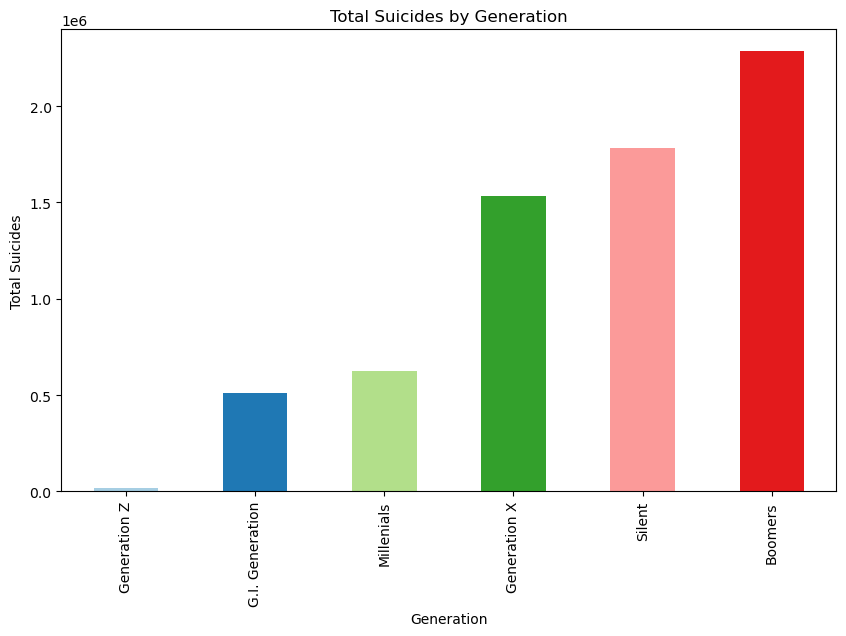

In [ ]:
# Bar plot for generation and suicide rate
df_generation_suicide = df.groupby('generation')['suicides_no'].sum().sort_values(ascending=True)

# Define the color palette
colors = sns.color_palette('Paired', len(df_generation_suicide))

# Create the bar plot
df_generation_suicide.plot(kind='bar', figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Generation')

# Show the plot
plt.show()

It is observed that the Boomers Generation had more suicide occurence, while Generation Z had the least.

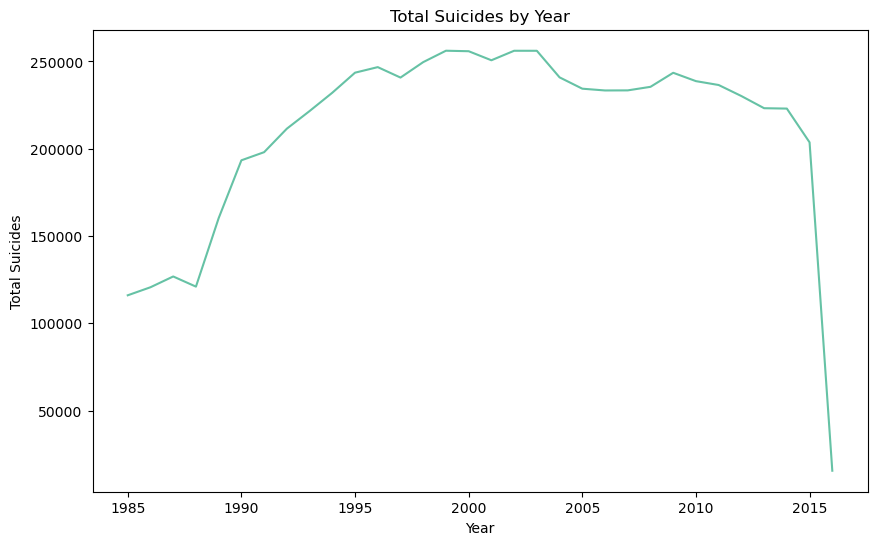

In [ ]:
# Line plot for year and suicide rate
df_year_suicide = df.groupby('year')['suicides_no'].sum()

# Define the color palette
colors = sns.color_palette('Set2', len(df_year_suicide))

# Create the line plot
df_year_suicide.plot(kind='line', figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Year')

# Show the plot
plt.show()

In [ ]:
# Group the DataFrame by year and calculate the sum of suicides
df_year_suicides = df.groupby('year')['suicides_no'].sum()

# Find the year with the highest number of suicides
year_max_suicides = df_year_suicides.idxmax()

# Find the year with the lowest number of suicides
year_min_suicides = df_year_suicides.idxmin()

# Print the results
print("Year with the highest number of suicides:", year_max_suicides)
print("Year with the lowest number of suicides:", year_min_suicides)

Year with the highest number of suicides: 1999
Year with the lowest number of suicides: 2016


It is observed that the year with the highest number of suicides is 1999 and the year with the lowest number of suicides is 2016.

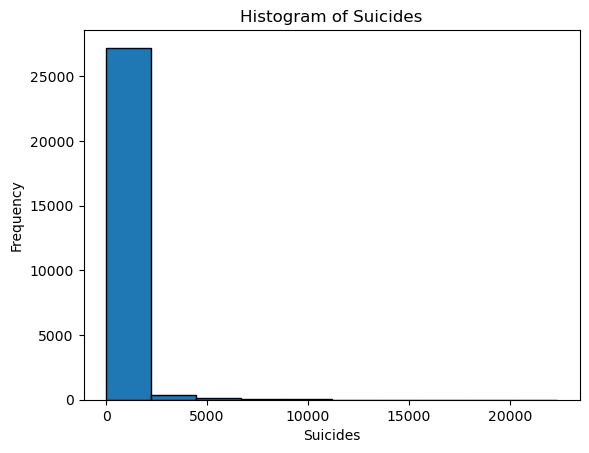

In [ ]:
# Plot histogram of 'suicides_no'
plt.hist(df['suicides_no'], bins=10, edgecolor='black')
plt.xlabel('Suicides')
plt.ylabel('Frequency')
plt.title('Histogram of Suicides')
plt.show()

In [ ]:
#checking for the skewness of the dataset
# Calculate the skewness of 'suicides_no'
skewness = df.skew()

# Print the skewness value
skewness

#The skewness value indicates the direction and degree of skewness. If the skewness is:

#Close to 0: The distribution is approximately symmetrical.
#Greater than 0: The distribution is positively skewed (tail on the right side).
#Less than 0: The distribution is negatively skewed (tail on the left side).

C:\Users\dcost\AppData\Local\Temp\ipykernel_6584\105927354.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()


year                  -0.160241
suicides_no           10.352910
population             4.459414
suicides/100k pop      2.963414
HDI for year          -0.300877
gdp_per_capita ($)     1.963470
dtype: float64

### Interpretation of Skewness of Dataset

1. Year: Skewness = -0.160241
The distribution of the "year" column is approximately symmetrical as the skewness value is close to 0. This suggests that the data is evenly distributed across different years.
<br>

2. Suicides_no: Skewness = 10.352910
The distribution of the "suicides_no" column is positively skewed (tail on the right side) as the skewness value is significantly greater than 0. This indicates that there are few years with a very high number of suicides, resulting in a long right tail.
<br>

3. Population: Skewness = 4.459414
The distribution of the "population" column is positively skewed (tail on the right side) as the skewness value is greater than 0. This suggests that there are relatively few years with very large populations, resulting in a long right tail
<br>

4. Suicides/100k pop: Skewness = 2.963414
The distribution of the "suicides/100k pop" column is positively skewed (tail on the right side) as the skewness value is greater than 0. This indicates that there are relatively few years with a high suicide rate per 100k population, resulting in a long right tail.
<br>

5. GDP_per_capita : Skewness = 1.963470
The distribution of the "gdp_per_capita" column is positively skewed (tail on the right side) as the skewness value is greater than 0. This suggests that there are relatively few years with a very high GDP per capita, resulting in a long right tail.
<br>

In summary, most of the columns in the dataset exhibit positive skewness, indicating that the tail of the distribution is longer on the right side. This means that there are relatively few extreme values in the positive direction, which might correspond to years with higher suicides, larger populations, higher suicide rates, or higher GDP per capita.

In [ ]:
kurtosis = df.kurtosis()


kurtosis

C:\Users\dcost\AppData\Local\Temp\ipykernel_6584\1049468859.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = df.kurtosis()


year                   -1.051749
suicides_no           157.168842
population             27.407176
suicides/100k pop      12.165745
HDI for year           -0.647914
gdp_per_capita ($)      4.937758
dtype: float64

### Interpretation of Kurtosis

1. Year: Kurtosis = -1.051749
The kurtosis value for the "year" column indicates that the distribution has platykurtic shape. It means that the distribution has lighter tails and a flatter peak compared to a normal distribution.
<br>

2. Suicides_no: Kurtosis = 157.168842
The kurtosis value for the "suicides_no" column indicates that the distribution has heavy tails and a sharper peak compared to a normal distribution. This suggests the presence of extreme values and a significant deviation from normality.
<br>

3. Population: Kurtosis = 27.407176
The kurtosis value for the "population" column indicates that the distribution has heavy tails and a sharper peak compared to a normal distribution. This suggests the presence of extreme values and a significant deviation from normality.
<br>

4. Suicides/100k pop: Kurtosis = 12.165745
The kurtosis value for the "suicides/100k pop" column indicates that the distribution has heavy tails and a sharper peak compared to a normal distribution. This suggests the presence of extreme values and a significant deviation from normality.
<br>

5. GDP_per_capita: Kurtosis = 4.937758
The kurtosis value for the "gdp_per_capita" column indicates that the distribution has heavier tails and a sharper peak compared to a normal distribution. This suggests the presence of extreme values and a significant deviation from normality.
<br>

In summary, most of the columns in the dataset exhibit high positive kurtosis, indicating heavy-tailed distributions with a sharper peak compared to a normal distribution. This suggests the presence of extreme values and a significant departure from normality, implying that the distributions are leptokurtic.

In [ ]:
from scipy import stats

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(df['suicides_no'])

# Printing the results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpreting the results
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (failed to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")


Shapiro-Wilk Test
Statistic: 0.25391268730163574
p-value: 0.0
The data is not normally distributed (reject H0)


C:\Users\AayushiKushwaha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Recommendations:

1. Improve mental health support: Given the complex nature of suicide rates, it is crucial to prioritize mental health support and resources. Governments and healthcare organizations should allocate adequate funding and develop comprehensive strategies to provide accessible and affordable mental health services. This includes promoting awareness, early intervention, and destigmatizing mental health issues to encourage individuals to seek help.
<br>

2. Implement evidence-based prevention strategies: Policymakers and public health professionals should implement evidence-based prevention strategies tailored to different demographics, age groups, and risk factors identified in the analysis. These strategies may include educational programs, community outreach initiatives, and targeted interventions to address the specific needs and vulnerabilities of different populations.
<br>

3. Enhance data collection and reporting: To improve the understanding of suicide rates, it is crucial to enhance data collection efforts. Governments should invest in comprehensive and standardized data collection systems to ensure accurate and consistent reporting of suicide cases. This includes collecting data on important variables such as mental health history, access to means, and underlying causes to identify patterns and risk factors more effectively.
<br>

4. Foster international collaboration: Suicide is a global issue that requires collaboration among countries. International organizations, governments, and NGOs should collaborate to share best practices, research findings, and resources. This collaboration can lead to a more comprehensive understanding of suicide rates and the development of effective prevention strategies across borders.

## Conclusion

By analyzing the KPI's we can conclude that suicide is a complex public health issue influenced by a variety of factors. This analysis has shed light on the relationship between suicide rates and variables such as population, human development, GDP per capita, age, and gender. While the analysis provides valuable insights, it is important to recognize that suicide is a multifaceted problem that requires a comprehensive approach.

To effectively address suicide rates, it is essential to prioritize mental health support, implement evidence-based prevention strategies, address socio-economic disparities, enhance data collection efforts, and foster international collaboration. By taking a holistic approach and investing in these recommendations, policymakers, public health professionals, and communities can work together to create a safer and healthier future for individuals worldwide.